## Aprendizagem Supervisionada - Classificação

In [1]:
#importações necessárias
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 1ª Definição problema

Criar máquina preditiva capaz de detectar qual tipo de flor selecionado (setosa, virginica e versicolor) a partir de caracterísiticas das petalas (largura e comprimento)e sepalas.

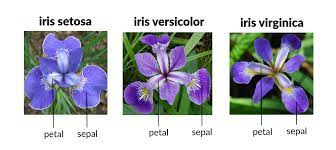

In [2]:
# IRIS dataset
from PIL import Image
%matplotlib inline
im = Image.open("IRIS.jfif")
im.show()
im

## 2ª Análise Exploratória de dados

In [3]:
# Carregando Iris dataset
iris = load_iris()

In [4]:
# Conhecendo atributos do dataset (descrição)
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
# Variáveis (feature_names)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# Domínio da variável target - 3 espécies de flores
y_names = iris.target_names
y_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 3º Pré-Processamento de dados

In [10]:
# Separação entre variáveis explicativas e target
x = iris.data # variáveis explicativas (quantitativa)
y = iris.target # array de labels (target, especificação, qualitativa)


##### Possibilidades de valores para Y:
0 -> setosa  
1 -> versicolor  
2 -> virginica  


In [11]:
# Divisão entre dados para treino e teste (30% teste)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

X_train

array([[5. , 3. , 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.7, 3.3, 5.7, 2.5],
       [5. , 3.5, 1.3, 0.3],
       [5. , 2.3, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [4.6, 3.6, 1. , 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [5.1, 3.4, 1.5, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.5, 2.6, 4.4, 1.2],
       [4.9, 3.6, 1.4, 0.1],
       [5.1, 3.5, 1.4, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [5.8, 2.6, 4. , 1.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.4, 2.9, 1.4, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.9, 4.3, 1.3],
       [6.5, 3.2, 5.1, 2. ],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3. , 5.2, 2.3],
       [6.8, 3. , 5.5, 2.1],
       [4.4, 3.2, 1.3, 0.2],
       [6. , 2.9, 4.5, 1.5],
       [5.1, 3.8, 1.6, 0.2],
       [5.8, 2.8, 5.1, 2.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.5, 2.4, 3.8, 1.1],
       [5.8, 2.7, 5.1, 1.9],
       [6.3, 3.3, 4.7, 1.6],
       [6.7, 2.5, 5.8, 1.8],
       [4.6, 3

## 4º Criando máquina preditiva

In [17]:
# Machine learning = problemas de classificação, algoritmo "Decision tree" (árvore de decisão)
#maquina_preditiva = tree.DecisionTreeClassifier()
maquina_preditiva = RandomForestClassifier()

In [18]:
maquina_preditiva.fit(X_train, Y_train)

RandomForestClassifier()

In [19]:
predicoes = maquina_preditiva.predict(X_test)
predicoes

array([0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1,
       0])

## 5º Avaliando acurácia do modelo de Machine Learning

In [20]:
# Avaliação de acurácia
accuracy = accuracy_score(predicoes, Y_test)*100
accuracy

93.33333333333333